# Primeiro Trabalho de Manutenção e Evolução de Software

**Lucas Pedroso Carvalho**  
Departamento de Ciência da Computação  
Universidade Federal de Minas Gerais  
lucaspedrosocarvalho@gmail.com

## Introdução

Sistemas de código aberto são normalmente desenvolvidos por um grupo pequeno de core developers. Eles são os principais responsáveis por desenvolver o software e colaborar de forma construtiva com outros colaboradores. Essa papel abrange todas as formas de contribuição, seja enviar patches para a implementação ou documentação, revisar commits de outras pessoas, analisar os issues reportados ou discutir ideias de design e desenvolvimento nas listas de discussão.

Diversos projetos de software de código aberto dependem inteiramente dos esforços voluntários de uma comunidade de desenvolvedores. Embora a maioria desses projetos possuam centenas de contribuidores, poucos realizam commits. Neste estudo, os core developers foram determinados a partir de uma heurística simples: são os desenvolvedores que em conjunto são responsáveis por 80% do total de commits de um sistema e, além disso, é exigido que cada um tenha um percentual mínimo de 5% de commits, garantindo uma quantidade mínima considerável de contribuição para com o projeto.

Neste estudo, objetivou-se investigar os cores developers dos principais projetos no GitHub. Para isso, foram definidas as seguintes questões de pesquisa para serem respondidas:

1. Qual o tamanho do conjunto de core developers dos sistemas analisados? Isto é, qual o sistema que tem o maior número de core developers?
2. Existem core developers que são bots? Se sim, o que esses bots fazem?
3. Como o tamanho deste conjunto de core developers varia por linguagem?
4. Como o tamanho deste conjunto de core developers varia por idade dos sistemas? Isto é, sistemas mais velhos tendem a ter mais core developers?
5. De quantos projetos os desenvolvedores analisados são core developers?
6. Como o tamanho deste conjunto de core developers varia com o número de commits de um sistema? Isto é, sistemas com muitos commits tendem a ter mais core developers?

## Metodologia

Para identificar os desenvolvedores core developers, a API do GitHub foi utilizada para coletar os dados dos projetos e seus contribuidores. Os dados obtidos através da API em formato JSON foram armazados para que pudessem ser manipulados.

**Limitação de Taxa**

A API do GitHub permite uma taxa de 60 solicitações não autenticadas por hora. Essas solicições são associadas ao endereço IP de origem e não ao usuário que faz solicitações. Para que todos os dados sejam coletados, diversas requisições são realizadas, ultrapassando o limite permitidio. Sendo assim, é necessário realizar uma autenticação na API, permitindo que até 5000 solicitações sejam realizadas por hora. Informe seu username e seu token do GitHub para continuar. 

In [502]:
username = 'lukaopc2'
token = '86f9e5ce9d6d29f9fa78cf478511c0cb0d9a6c24'

Neste estudo foi coletado 50 projetos com mais estrelas para cada uma das seguintes linguagens: JavaScript, Python, Ruby, Java e PHP.

In [503]:
languages = ['JavaScript', 'Python', 'Ruby', 'Java', 'PHP']
languagesSize = len(languages)

sort = 'stars'
order = 'desc'

O código principal a seguir apresenta os principais mecanismos para obter as informações dos projetos e de seus colaboradores. Inicilamente, os 50 principais projetos são obtidos de cada linguagem. Para cada projeto, é armazenado algumas informações importantes, como seu nome, data de criação e a lista de seus colaboradores. Em seguida, esse lista é acessada e o total de contribuições de um desenvolvedor é incrementado ao total de commites do projeto, inicialmente setado como zero. Nesse ponto, já se conhece o número de commits do projeto, permitindo que as porcentagens de 80% do total de commits e 5% do total de commits individual seja calculado.

Todos os colaboradores com os maiores commites são novamente analisados para verificar se atendem as duas condições para serem core developers. Quando os core developers atingirem 80% do total de commits do projeto, a análise é finalizada e os core developers são armazenados.

In [504]:
# Biblioteca para manipular JSON
import requests
import json

# Desenvolvedores core developer
devCoreDeveloper = []
devCoreDeveloperRepo = []

# Lista as principais informações dos projetos
list = []

# Loop para obter os dados de todas as linguagens
for h in range(languagesSize): 
    
    language = languages[h]
    
    # Requisição dos 50 principais projetos da linguagem
    repos = requests.get('https://api.github.com/search/repositories?q=language:' + language + '&sort=' + sort + '&order=' + order + '&per_page=50')
    reposItem = json.loads(repos.text or repos.content)
    
    # Quantidade de projetos obtidos
    reposSize = len(reposItem['items'])
    
    # Loop para obter os dados de todos os projetos
    for i in range(reposSize):
        
        # Principais dados dos projetos
        name = reposItem['items'][i]['name']
        #print(name)
        createdAt = reposItem['items'][i]['created_at']
        contributorsUrl = reposItem['items'][i]['contributors_url']

        # Página atual com apenas 100 contribuidores
        page = 1
        
        # Verifica se existem novos contribuidores na lista
        contributorsSize = 1
        
        # Total de commits do projeto
        commitsCount = 0
        
        # Total de contribuidores do projeto
        contributorsCount = 0

        # Loop para obter os dados de todos os contridores e identificar o total de commits do projeto
        while(contributorsSize > 0):
            
            # Requisição da página com, no máximo, 100 contribudores do projeto
            contributors = requests.get(contributorsUrl, '?&per_page=100&page=' + str(page), auth=(username,token))
            contributorsItem = json.loads(contributors.text or contributors.content)
            contributorsSize = (len(contributorsItem))
            
            # Loop para obter os dados de um contribuidor do projeto
            for j in range(contributorsSize):

                contributions = contributorsItem[j]['contributions']
                commitsCount = commitsCount + contributions
                contributorsCount = contributorsCount + 1

            page = page + 1
            #contributorsSize = 0

        # Porcentagem mínima de commits de cada contribuidor
        porcentageContributor5 = (commitsCount * 5)/100

        # Porcentagem de commits total
        commitsTotal80 = (commitsCount * 80)/100
        
        # Total de core developers
        coreDevelopersCount = 0
                
        #Varíaveis auxiliares
        page = 1
        contributorsSize = 1
        commitsCount = 0
        newCoreDeveloper = 1
        
        # Loop para obter novamente os dados dos contribudores e identificar os core developers
        while(contributorsSize > 0 and newCoreDeveloper == 1):
            
            # Requisição de um contribuidor do projeto
            contributors = requests.get(contributorsUrl, '?&per_page=1&page=' + str(page), auth=(username,token))
            contributorsItem = json.loads(contributors.text or contributors.content)
            contributorsSize = (len(contributorsItem))
            
            # Verifica se existe contribuidor para ser analizado
            if(contributorsSize > 0):
                login = contributorsItem[0]['login']
                contributions = contributorsItem[0]['contributions']
                
                # Verifica se o contribuidor pode ser core developer
                if(contributions >= porcentageContributor5):
                    
                    # Verifica se o contribuidor pode ser core developer
                    if(commitsCount <= commitsTotal80):
                        coreDevelopersCount = coreDevelopersCount + 1
                        commitsCount = commitsCount + contributions
                        #print ('Core Developers')
                        #print ('Login: ' + login + " Contributions: ", contributions)
                        devCoreDeveloper = devCoreDeveloper + [login]
                        devCoreDeveloperRepo = devCoreDeveloperRepo + [name]
                        
                    else:
                        newCoreDeveloper = 0 
                        
                else:
                    newCoreDeveloper = 0
                
            # Incremento para analisar o próximo contribuidor
            page = page + 1

        # Defini dados do projeto
        tuple = (language, name, createdAt, commitsCount, contributorsCount, coreDevelopersCount)
        list = list + [tuple]

freeCodeCamp
vue
react
d3
javascript
react-native
angular.js
Font-Awesome
create-react-app
node
jquery
axios
atom
three.js
redux
webpack
socket.io
Semantic-UI
reveal.js
html5-boilerplate
meteor
express
material-ui
Chart.js
moment
free-programming-books-zh_CN
resume.github.com
puppeteer
javascript-algorithms
json-server
lodash
impress.js
materialize
yarn
react-router
hacker-scripts
markdown-here
gulp
Front-End-Checklist
incubator-echarts
brackets
jQuery-File-Upload
babel
next.js
storybook
backbone
Ghost
prettier
parcel
pm2
awesome-python
system-design-primer
public-apis
youtube-dl
models
flask
thefuck
httpie
django
awesome-machine-learning
requests
keras
ansible
scikit-learn
scrapy
shadowsocks
XX-Net
big-list-of-naughty-strings
certbot
you-get
CppCoreGuidelines
cpython
Deep-Learning-Papers-Reading-Roadmap
linux-insides
tldr
sentry
YouCompleteMe
python-patterns
tornado
face_recognition
home-assistant
Detectron
pandas
jieba
interactive-coding-challenges
reddit
wechat_jump_game
compose
dat

O trecho de código acima armazena 6 informações de cada projeto em uma lista. Essas informações serão utilizadas na seção a seguir para responder as questões de pesquisa. Tais informações são listadas abaixo:
    
1. Linguagem 
2. Nome
3. Data de criação
4. Total de commits
5. Total de contribuidores 
6. Total de core developers

Os dados brutos podem ser visualizados descomentando o trecho de código a seguir:

In [566]:
listSize = len(list)
#for i in range(listSize):
#    print(list[i])

## Resultados

Nesta seção serão apresentados os resultados para cada questão de pesquisa. Foi utilizado a biblioteca Matplotlib para gerar gráficos a partir dos escripts em Phyton.

In [567]:
import numpy as np
import matplotlib.pyplot as plt

**1. Qual o tamanho do conjunto de core developers dos sistemas analisados? Isto é, qual o sistema que tem o maior número de core developers?**

No gráfico a seguir é apresentado a quantidade projetos por core developers, isto é, por exemplo, quantos projetos possuem 1 core developer e assim por diante. Percebe-se que 1 core developer é predominante em aproximadamente 70 projetos. O número de projetos tende a cair sequencialmente quando o número de core developers aumenta. Pode-se identificar uma equivaência entre projetos com 2,3 e 4,5 core developers. Poucos projetos possuem 6, 7 ou 8 core developers.

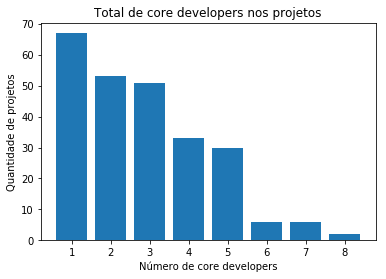

In [574]:
# Calculando o total de core developers

bars = []
height = []

mostCoreDevelopers = 0

for i in range(listSize):
    if(list[i][5] > mostCoreDevelopers):
        mostCoreDevelopers = list[i][5]

contCoreDevelopers = 0
        
for i in range(mostCoreDevelopers):
    index = i+1
    bars = bars + [index]
    for j in range(listSize):
        if (index == list[j][5]):
            contCoreDevelopers = contCoreDevelopers + 1
    height = height + [contCoreDevelopers]
    contCoreDevelopers = 0

# Barras
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
 
# Nomes no eixo x
plt.xticks(y_pos, bars)

# Labels
plt.title('Total de core developers nos projetos')
plt.xlabel('Número de core developers')
plt.ylabel('Quantidade de projetos')    

# Mostrar o gráfico
plt.show()

O trecho de código a seguir apresenta o nome de todos os projetos que possuem a maior quantidade de core developers.

In [577]:
listMostCoreDeveloper = []
repoMostCoreDeveloperCount = 0
coreDeveloperIndex = 0

for i in range(len(height)):
    if(height[i] > repoMostCoreDeveloperCount):
        repoMostCoreDeveloperCount = height[i]
        coreDeveloperIndex = i+1

print('PROJETOS COM', coreDeveloperIndex, 'CORE DEVELOPERS')

for i in range(listSize):
    if(list[i][5] == coreDeveloperIndex):
        listMostCoreDeveloper = listMostCoreDeveloper + [list[i][1]]

print(listMostCoreDeveloper)

PROJETOS COM 1 CORE DEVELOPERS
['vue', 'webpack', 'Semantic-UI', 'reveal.js', 'javascript-algorithms', 'json-server', 'lodash', 'hacker-scripts', 'markdown-here', 'Front-End-Checklist', 'jQuery-File-Upload', 'awesome-python', 'system-design-primer', 'httpie', 'keras', 'shadowsocks', 'big-list-of-naughty-strings', 'linux-insides', 'tornado', 'face_recognition', 'interactive-coding-challenges', 'data-science-ipython-notebooks', 'localstack', 'ItChat', 'fastlane', 'awesome-react-native', 'devdocs', 'sass', 'sidekiq', 'fpm', 'grape', 'postal', 'quine-relay', 'glide', 'lottie-android', 'butterknife', 'zxing', 'AndroidUtilCode', 'EventBus', 'Android-Universal-Image-Loader', 'jadx', 'fastjson', 'SmartRefreshLayout', 'proxyee-down', 'druid', 'Android-CleanArchitecture', 'Material-Animations', 'JCSprout', 'zheng', 'greenDAO', 'CircleImageView', 'laravel', 'Faker', 'guzzle', 'PHPMailer', 'monolog', 'phpunit', 'PHPExcel', 'koel', 'laravel-debugbar', 'image', 'PHP-Parser', 'laravel-ide-helper', 'f

**2. Existem core developers que são bots? Se sim, o que esses bots fazem?**

Colaboradores boots são aqueles usuários programados para realizaem determinadas ações, como subir commits específicos de após a ocorrência de um evento pré-definido. Esses colabores geralmente possuem um nome de usuário característico. Para responder essa pergunta, todos os core developers foram analisadas de maneira geral, verificando se algum deles possuia algum destaque. Quando algum login chamava atenção, o perfil do usuário foi analisado no GitHub.

In [580]:
auxDevCoreDeveloper = devCoreDeveloper

# Remove core developers duplicados
noDupes = [x for n, x in enumerate(devCoreDeveloper) if x not in devCoreDeveloper[:n]]
print('LOGIN DOS CORE DEVELOPERS')
print(noDupes)

devCoreDeveloper = auxDevCoreDeveloper

LOGIN DOS CORE DEVELOPERS
['QuincyLarson', 'sahat', 'terakilobyte', 'raisedadead', 'yyx990803', 'zpao', 'sophiebits', 'gaearon', 'sebmarkbage', 'jimfb', 'mbostock', 'jasondavies', 'ljharb', 'hshoff', 'IgorMinar', 'petebacondarwin', 'mhevery', 'Narretz', 'vojtajina', 'gkalpak', 'matsko', 'robmadole', 'talbs', 'Timer', 'ry', 'bnoordhuis', 'isaacs', 'Trott', 'jeresig', 'timmywil', 'dmethvin', 'jzaefferer', 'rwaldron', 'mzabriskie', 'nickuraltsev', 'kevinsawicki', 'nathansobo', 'benogle', 'as-cii', 'maxbrunsfeld', 'mrdoob', 'alteredq', 'markerikson', 'timdorr', 'sokra', 'rauchg', '3rd-Eden', 'einaros', 'jlukic', 'hakimel', 'paulirish', 'necolas', 'alrra', 'glasser', 'benjamn', 'dgreensp', 'Slava', 'stubailo', 'avital', 'n1mmy', 'tj', 'dougwilson', 'oliviertassinari', 'hai-cea', 'mbrookes', 'etimberg', 'tannerlinsley', 'simonbrunel', 'ichernev', 'timrwood', 'icambron', 'justjavac', 'spacewander', 'u2', 'NumEricR', 'n1k0', 'aslushnikov', 'JoelEinbinder', 'trekhleb', 'typicode', 'jdalton', 'b

Ao analisar os nomes dos usuários acima, não foi possível confirmar a presença de nenhum boot no conjunto de core developers.

**3. Como o tamanho deste conjunto de core developers varia por linguagem?**

Para responder essa questão de pesquisa, os dados des core developers foram avaliados para cada uma das 5 linguagens. Foram criado 5 gráficos com a quantidade de core developers para cada linguagem de desenvolvimento de sistema.

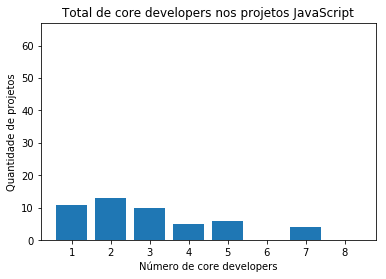

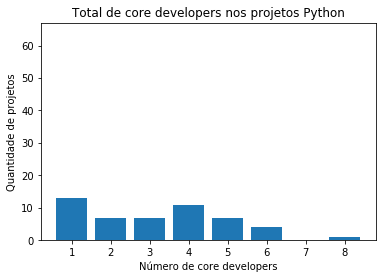

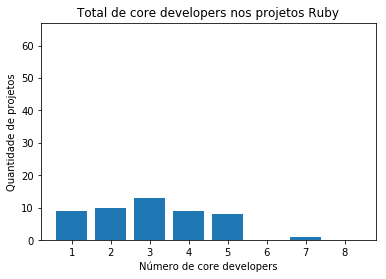

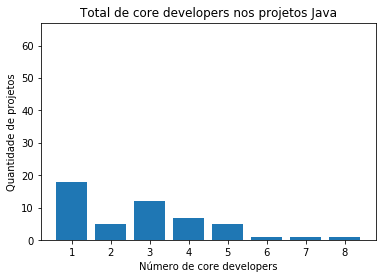

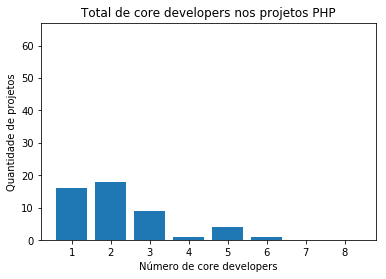

In [510]:
bars = []

for i in range(mostCoreDevelopers):
    index = i+1
    bars = bars + [index]

for h in range(languagesSize):    
    height = []

    countCoreDevelopersLanguage = 0

    for i in range(mostCoreDevelopers):
        index = i+1
        for j in range(listSize):
            if (index == list[j][5] and languages[h] == list[j][0]):
                countCoreDevelopersLanguage = countCoreDevelopersLanguage + 1
        height = height + [countCoreDevelopersLanguage]
        countCoreDevelopersLanguage = 0
    
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    
    axes = plt.gca()
    axes.set_ylim([0,repoMostCoreDeveloperCount])

    # Nomes no eixo x
    plt.xticks(y_pos, bars)

    # Labels
    plt.title('Total de core developers nos projetos '+ languages[h])
    plt.xlabel('Número de core developers')
    plt.ylabel('Quantidade de projetos')    

    # Mostrar o gráfico
    plt.show()

É interessante notar que não existem diferenças significativas do número de core developers por linguagem. No geral, a quantidade de projetos tende a diminuir com o aumento do número de core developers.

**4. Como o tamanho deste conjunto de core developers varia por idade dos sistemas? Isto é, sistemas mais velhos tendem a ter mais core developers?**

Para responder a quarta pergunta, a data de criação dos projetos foi analisada juntamente com sua quantidade de core developers. Foi possível identificar que não existe uma relação explífica da quantidade de core developers pela idade do sistema.

Text(0,0.5,'Quantidade de projetos')

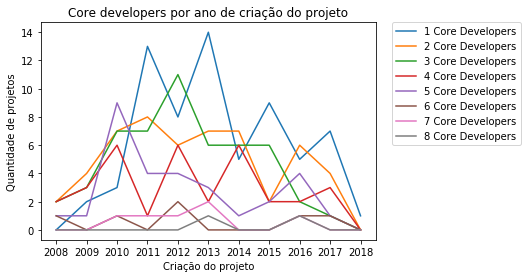

In [511]:
# Intervalo dos anos de criação dos projetos
years = []

# Ano atual
today = 2018

# Ano mais antigo de criação projeto
mostOld = today

for i in range(len(list)):
    yearCreated = int(list[i][2][:4])
    if (yearCreated < mostOld):
        mostOld = yearCreated

# Diferença entre hoje e o ano mais antigo
diferenceYears = today - mostOld + 1

for i in range(diferenceYears):
    years = years + [today - i]

years.sort()
coreDevelopers = []
bars = []

# Identificar a número de core developers
for i in range(mostCoreDevelopers):
    index = i+1
    bars = bars + [index]

# Valor de cada valor de core developer
line = []

y_pos = np.arange(len(years))
plt.xticks(y_pos, years)

# Criar linha no gráfico
for i in range(len(bars)):
    line = []
    for j in range(len(years)):
        countCoreDevelopersByYear = 0
        for k in range(len(list)):
            if(years[j] == int(list[k][2][:4]) and bars[i] == list[k][5]):
                countCoreDevelopersByYear = countCoreDevelopersByYear + 1
        line = line + [countCoreDevelopersByYear]
    labelGraph = str(i+1) + ' Core Developers'
    plt.plot(line, label=labelGraph)
    #print(line)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.title('Core developers por ano de criação do projeto')
plt.xlabel('Criação do projeto')
plt.ylabel('Quantidade de projetos')  

**5. De quantos projetos os desenvolvedores analisados são core developers?**

Identificou-se que a maioria dos core developers é core developer de apenas um projeto. No entanto, alguns contribuem para mais de um. Na tabela abaixo são apresentados os usuários que são core developers de 2 ou mais projetos. São poucos os usuários que contribuem para mais de 2, entretando alguns de destacam.

In [561]:
# Bibliotca
import pandas as pd

# Identificar desenvolvedores core developers em mais de um projeto
dupes = [x for n, x in enumerate(devCoreDeveloper) if x in devCoreDeveloper[:n]]
dupesNoDuplicate = [x for n, x in enumerate(dupes) if x not in dupes[:n]]

contDupes = 0
listContDups = []

# Verificar todos os core developers
for i in range(len(dupesNoDuplicate)):
    for j in range(len(devCoreDeveloper)):
        if(dupesNoDuplicate[i] == devCoreDeveloper[j]):
            contDupes = contDupes + 1
    listContDups = listContDups + [contDupes]
    contDupes = 0
      
# Criar tabela
pd.DataFrame(listContDups, columns=["Número de projetos em que é core developer"], index=dupesNoDuplicate)

,Número de projetos em que é core developer
gaearon,3
timdorr,2
kittens,2
rauchg,2
arunoda,2
mitsuhiko,2
donnemartin,3
kennethreitz,2
MikeMcQuaid,2
jacknagel,2


O usuário JakeWharton se destacou por ser core developer de 6 diferentes projetos. Ele participa do GitHub desde 2008, contribui para 98 repositórios e participa de organizações como Google, Robolectric, ReactiveX GRPC, TODO Group e Android. Os projetos que ele é core developer são listados a seguir:

In [563]:
for i in range(len(devCoreDeveloper)):
    if ('JakeWharton' == devCoreDeveloper[i]):
        print(devCoreDeveloperRepo[i])

NameError: name 'devCoreDeveloperRepo' is not defined

**6. Como o tamanho deste conjunto de core developers varia com o número de commits de um sistema? Isto é, sistemas com muitos commits tendem a ter mais core developers?**

O número de commits tende a crescer com o aumento do número de core developers. Isso indica que maior esforço entre os desenvolvers para contribuir com o sistema. No entanto, a parti de 4 core developers, o número de commits tende a diminuir.

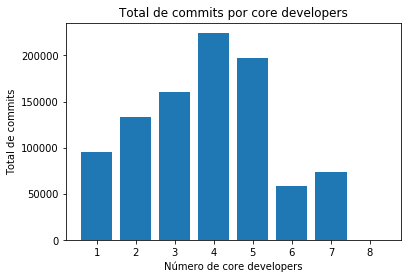

In [513]:
# Calculando o total de core developers

commitList = []
commitCount = 0

for i in range(len(bars)):
    for j in range(len(list)):
        if(list[j][5] == i+1):
            commitCount = commitCount + list[j][3]
    commitList = commitList + [commitCount]
    commitCount = 0

# Barras
y_pos = np.arange(len(bars))
plt.bar(y_pos, commitList)
 
# Nomes no eixo x
plt.xticks(y_pos, bars)

# Labels
plt.title('Total de commits por core developers')
plt.xlabel('Número de core developers')
plt.ylabel('Total de commits')    

# Mostrar o gráfico
plt.show()

## Conclusão

Neste trabalho objetivou-se utilizar a API do GitHub juntamente com o Jupyter Notebook para investigar os core developers dos principais projetos da plataforma. Foi criado um esboço inicial de um paper "vivo", isto é, todos os códigos são incorporados no mesmo documento do texto, permitindo que o leitor altere determinados atributos, garantindo a validade da pesquisa. Além disso, todos os dados estão sempre atualizados, pois são obtidos dinamicamente da API do GitHub ao "compilar" o paper.

Durante o desenvolvimento inicila deste estudo, foram encontrados 3 desafios: 1) conhecimento inicial da linguagem Phyton; 2) tentou-se utilizar uma biblioteca de terceiros para facilitar o acesso à API do GitHub, entretando foram encontradas limitações de requisições e da sua documentação e; 3) desconhecimento do limite de requisições da API do GitHub, impossibilitando que novos dados pudessem ser obtidos.